In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

girl2Noise32Hibin_fp = 'assets/girl2Noise32Hibin.sec'
girl2Noise32bin_fp = 'assets/girl2Noise32bin.sec'
girl2bin_fp = 'assets/girl2bin.sec'

### Part A

Mean Squared Error between girl2 and girl2Noise32 =  744.4679107666016
Mean Squared Error between girl2 and girl2Noise32Hi =  692.5050201416016


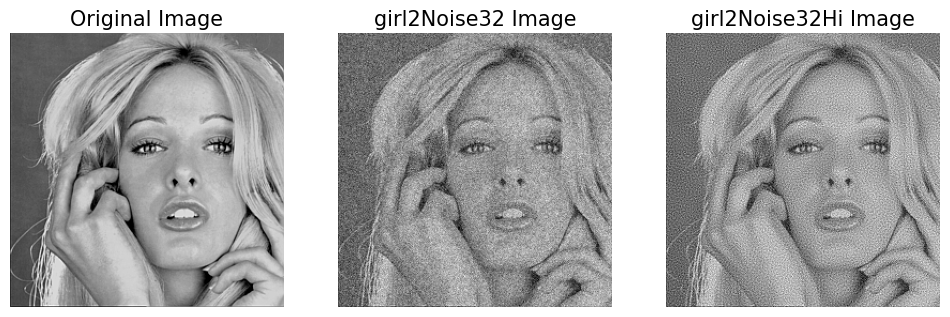

In [6]:
def read_bin(file_path, size):
    with open(file_path, 'rb') as file:
        data = np.fromfile(file, dtype=np.uint8, count=size*size)
        return np.reshape(data, (size, size))

def pltshow(subplot, data, title, fontsize=15):
    plt.subplot(subplot[0], subplot[1], subplot[2])
    plt.imshow(data, cmap='gray', vmin=0, vmax=255)
    plt.axis('off')
    plt.title(title, fontsize=fontsize)

X = read_bin(girl2bin_fp, 256)
X1 = read_bin(girl2Noise32bin_fp, 256)
X2 = read_bin(girl2Noise32Hibin_fp, 256)

E1 = np.sum((X.astype("float") - X1.astype("float"))**2)
E1 /= float(X.shape[0] * X1.shape[1])

E2 = np.sum((X.astype("float") - X2.astype(float))**2)
E2 /= float(X.shape[0] * X2.shape[1])

print("Mean Squared Error between girl2 and girl2Noise32 = ", E1)
print("Mean Squared Error between girl2 and girl2Noise32Hi = ", E2)

plt.figure(figsize=(12, 6))
pltshow((1, 3, 1), X, 'Original Image')
pltshow((1, 3, 2), X1, 'girl2Noise32 Image')
pltshow((1, 3, 3), X2, 'girl2Noise32Hi Image')

plt.show()


### Part B

C:\Users\trido\AppData\Local\Temp\ipykernel_10604\429628622.py:5: ComplexWarning: Casting complex values to real discards the imaginary part
  return stretched_img.astype(np.uint8)


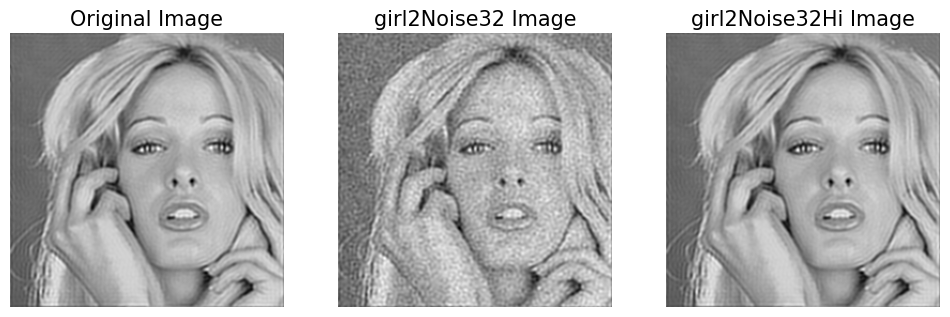

MSE of Z 127.74808311981647
MSE of Z1 550.8786914157856
MSE of Z2 398.99781881247645
ISNR of girl2Noise32Hibin =  2.3945240450623864
ISNR of girl2Noise32bin =  1.3079000912650378


C:\Users\trido\AppData\Local\Temp\ipykernel_10604\429628622.py:25: ComplexWarning: Casting complex values to real discards the imaginary part
  EZ = np.sum((X.astype("float") - Z.astype("float"))**2)
C:\Users\trido\AppData\Local\Temp\ipykernel_10604\429628622.py:28: ComplexWarning: Casting complex values to real discards the imaginary part
  EZ1 = np.sum((X.astype("float") - Z1.astype("float"))**2)
C:\Users\trido\AppData\Local\Temp\ipykernel_10604\429628622.py:31: ComplexWarning: Casting complex values to real discards the imaginary part
  EZ2 = np.sum((X.astype("float") - Z2.astype(float))**2)


In [7]:
def stretch2(img):
    img_min = np.min(img)
    img_max = np.max(img)
    stretched_img = 255 * (img - img_min) / (img_max - img_min)
    return stretched_img.astype(np.uint8)

U_cutoff = 64
[U, V] = np.meshgrid(np.arange(-128, 128), np.arange(-128, 128))

HLtildeCenter = np.double(np.sqrt(U**2 + V**2) <= U_cutoff)
HLtilde = np.fft.fftshift(HLtildeCenter)

Z = np.fft.ifft2(np.fft.fft2(X) * HLtilde)
Z1 = np.fft.ifft2(np.fft.fft2(X1) * HLtilde)
Z2 = np.fft.ifft2(np.fft.fft2(X2) * HLtilde)

plt.figure(figsize=(12, 6))

pltshow((1, 3, 1), stretch2(Z), 'Original Image')
pltshow((1, 3, 2), stretch2(Z1), 'girl2Noise32 Image')
pltshow((1, 3, 3), stretch2(Z2), 'girl2Noise32Hi Image')

plt.show()

EZ = np.sum((X.astype("float") - Z.astype("float"))**2)
EZ /= float(X.shape[0] * Z.shape[1])

EZ1 = np.sum((X.astype("float") - Z1.astype("float"))**2)
EZ1 /= float(X.shape[0] * Z1.shape[1])

EZ2 = np.sum((X.astype("float") - Z2.astype(float))**2)
EZ2 /= float(X.shape[0] * Z2.shape[1])

ISNR1 = 10 * np.log10(E1/EZ1)
ISNR2 = 10 * np.log10(E2/EZ2)

print('MSE of Z', EZ)
print('MSE of Z1', EZ1)
print('MSE of Z2', EZ2)
print('ISNR of girl2Noise32Hibin = ', ISNR2)
print('ISNR of girl2Noise32bin = ', ISNR1)


### Part C

C:\Users\trido\AppData\Local\Temp\ipykernel_10604\2170191190.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  ZPH2[:256, :256] = H2
C:\Users\trido\AppData\Local\Temp\ipykernel_10604\429628622.py:5: ComplexWarning: Casting complex values to real discards the imaginary part
  return stretched_img.astype(np.uint8)


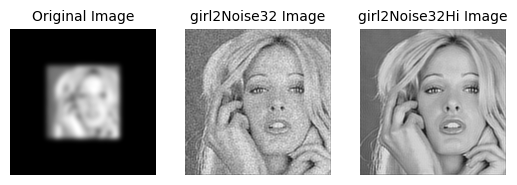

In [11]:
U_cutoff_H = 64
SigmaH = 0.19 * 256 / U_cutoff_H
[U, V] = np.meshgrid(np.arange(-128, 128), np.arange(-128, 128))
HtildeCenter = np.exp((-2*np.pi**2 * SigmaH**2)/(256*2) * (U**2 + V**2))
Htilde = np.fft.fftshift(HtildeCenter)
H = np.fft.ifft2(Htilde)
H2 = np.fft.fftshift(H)
ZPH2 = np.zeros((512, 512))
ZPH2[:256, :256] = H2

ZPX = np.zeros((512, 512))
ZPX[:256, :256] = X
T = np.fft.ifft2(np.fft.fft2(ZPX) * np.fft.fft2(ZPH2))

ZPX = np.zeros((512, 512))
ZPX[:256, :256] = X
T = np.fft.ifft2(np.fft.fft2(ZPX) * np.fft.fft2(ZPH2))


pltshow((1, 3, 1), stretch2(T), 'Original Image', 10)
pltshow((1, 3, 2), stretch2(Z1), 'girl2Noise32 Image', 10)
pltshow((1, 3, 3), stretch2(Z2), 'girl2Noise32Hi Image', 10)

plt.show()